In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Read the dataset from the CSV file
def read_dataset(path):
    file = pd.read_csv(path)
    print("..........Dataset..........")
    print(file) 
    return file

# Calculate the mean for each column
def mean_for_each_column(dataset):
    print("..........Mean for each column..........")
    print(str(dataset.mean(numeric_only=True))+"\n")

# Calculate the median for each column
def median_for_each_column(dataset):
    print("..........Median for each column..........")
    print(str(dataset.median(numeric_only=True))+"\n")

# Calculate the mode for each column
def mode_for_each_column(dataset):
    print("..........Mode for each column..........")
    print(str(dataset.mode().iloc[0]) + "\n")

# Calculate the % of missing values for each column
def missing_value_percentage_for_each_column(dataset):
    total = dataset.shape[0]  # Number of lines
    missing_values = dataset.isnull().sum()  # Sum of the missing values in each column
    percentage = (missing_values / total) * 100  # Calculate the percentage of missing values in each column
    print("..........perc. of missing values..........")
    print(percentage)

# Box-plot for each column
def box_plot_for_each_column(dataset):
    numeric_columns = dataset.select_dtypes(include='number')
    if numeric_columns.empty:
        print("No numeric columns found in the dataset.")
    else:
        numeric_columns.boxplot(figsize=(10, 6))
        plt.title("Boxplot for all numeric columns")
        plt.xticks(rotation=45)  # Rotation in x, if necessary
        plt.show()

# Bar-chart for each column
def bar_chart_for_each_column(dataset):
    non_numeric_columns = dataset.select_dtypes(exclude='number')
    if non_numeric_columns.empty:
        print("Any non-numeric columns found in the dataset.")
    else:
        for column in non_numeric_columns.columns:
            value_counts = non_numeric_columns[column].value_counts()
            plt.figure(figsize=(10, 6))
            value_counts.plot(kind='bar')
            plt.title(f"Bar chart for '{column}'")
            plt.xlabel(column)
            plt.ylabel("Count")
            plt.xticks(rotation=45)
            plt.tight_layout()  # Adjust layout to prevent overlap
            plt.show()

# Remove as colunas com valores vazios
def remove_columns_with_missing_values(dataset):
    # Verifica a quantidade de colunas antes e depois de remover
    before = dataset.shape[1]
    dataset_cleaned = dataset.dropna(axis=1)
    after = dataset_cleaned.shape[1]
    
    print("..........Remove columns without values..........")
    print(f"Colunas removidas: {before - after}"+"\n")
    return dataset_cleaned

# Guardar o dataset modificado numa nova pasta
def save_cleaned_dataset(dataset, original_filename, new_folder_name='datasetsTratados'):
    # Criar a nova pasta, se não existir
    if not os.path.exists(new_folder_name):
        os.makedirs(new_folder_name)
    
    # Definir o novo caminho de destino para o dataset
    base_filename = os.path.basename(original_filename)
    new_file_path = os.path.join(new_folder_name, base_filename)
    
    # Guardar o novo dataset
    dataset.to_csv(new_file_path, index=False)
    print(f"Dataset guardado em: {new_file_path}")


..........Dataset..........
      playerID                                   award  year  lgID
0   thompti01w      All-Star Game Most Valuable Player     1  WNBA
1   leslili01w      All-Star Game Most Valuable Player     2  WNBA
2   leslili01w      All-Star Game Most Valuable Player     3  WNBA
3   teaslni01w      All-Star Game Most Valuable Player     4  WNBA
4   swoopsh01w      All-Star Game Most Valuable Player     6  WNBA
..         ...                                     ...   ...   ...
90  boltoru01w  WNBA All Decade Team Honorable Mention     7  WNBA
91  holdsch01w  WNBA All Decade Team Honorable Mention     7  WNBA
92  penicti01w  WNBA All Decade Team Honorable Mention     7  WNBA
93  tauradi01w  WNBA All Decade Team Honorable Mention     7  WNBA
94  weathte01w  WNBA All Decade Team Honorable Mention     7  WNBA

[95 rows x 4 columns]
..........Remove columns without values..........
Colunas removidas: 0

Dataset guardado em: datasetsTratados/awards_players.csv
..........Mean f

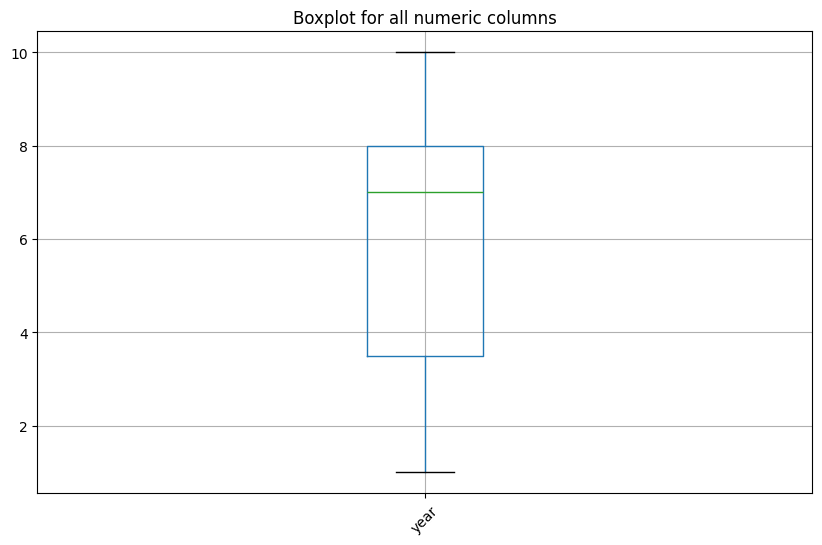

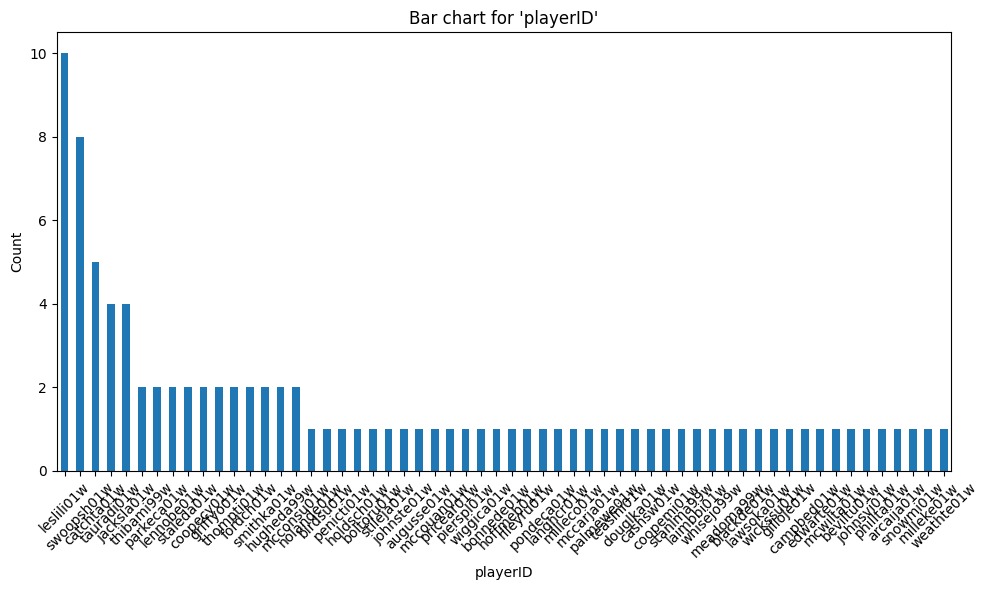

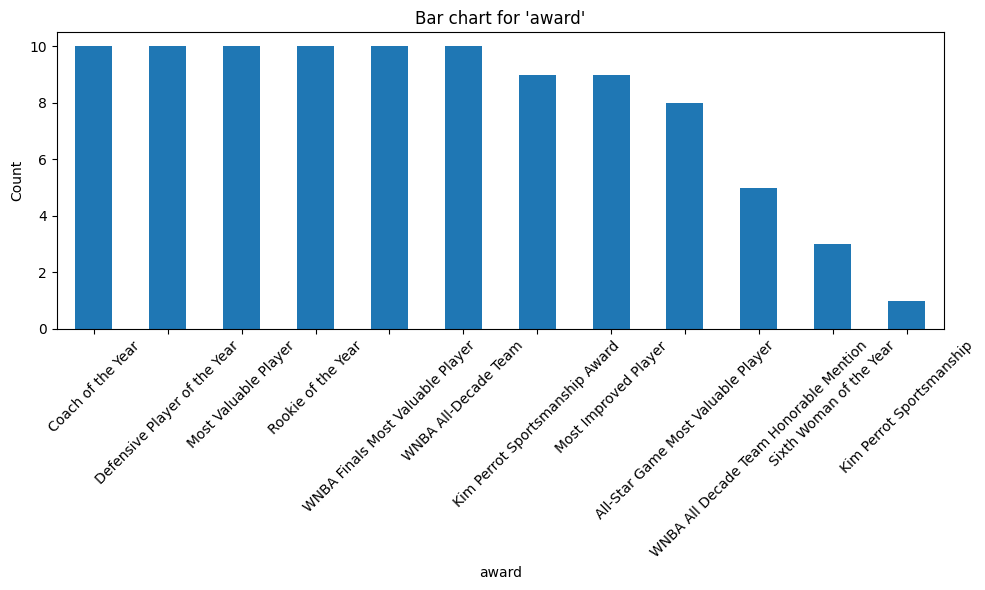

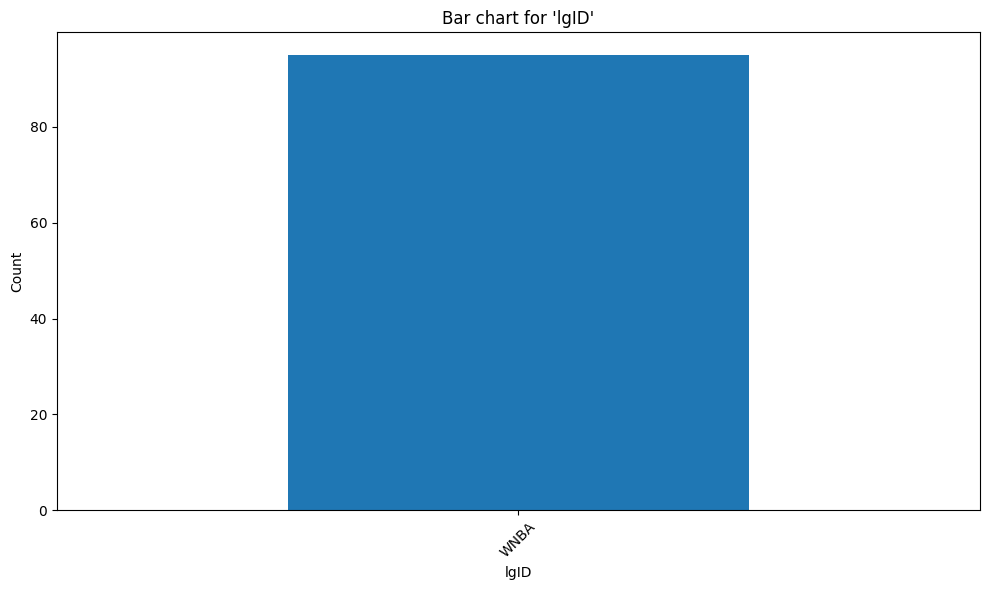

In [3]:
# Definir o caminho para o dataset (ou podes usar uma célula separada para carregar diretamente via upload no Jupyter)
current_dir = os.getcwd()
datasets_dir = os.path.join(current_dir, 'datasets')
awards_players_path = os.path.join(datasets_dir, 'awards_players.csv')

# Ler o dataset
try:
    file = read_dataset(awards_players_path)

    cleaned_dataset = remove_columns_with_missing_values(file)
    save_cleaned_dataset(cleaned_dataset, awards_players_path)
    
    # Calcular e imprimir a média, mediana, moda e % de valores em falta
    mean_for_each_column(cleaned_dataset)
    median_for_each_column(cleaned_dataset)
    mode_for_each_column(cleaned_dataset)
    missing_value_percentage_for_each_column(cleaned_dataset)

    # Criar box-plot e gráfico de barras
    box_plot_for_each_column(cleaned_dataset)
    bar_chart_for_each_column(cleaned_dataset)

except FileNotFoundError:
    print("File not found.")
except Exception as e:
    print(f"Error: {e}")
